BioPandas

Author: Sebastian Raschka <mail@sebastianraschka.com>  
License: BSD 3 clause  
Project Website: http://rasbt.github.io/biopandas/  
Code Repository: https://github.com/rasbt/biopandas  

In [1]:
%load_ext watermark
%watermark -d -u -v -p pandas,biopandas

Last updated: 11/23/2015 

CPython 3.5.0
IPython 4.0.0

pandas 0.17.0
biopandas 0.1.0


In [ ]:
import pandas as pd
pd.set_option('display.width', 600)

# Working with PDB Structures in DataFrames

## Loading PDB Files

There are 2 1/2 ways to load a PDB structure into a `PandasPDB` object.


#### 1
PDB files can be directly fetched from The Protein Data Bank at [http://www.rcsb.org](http://www.rcsb.org) via its unique 4-letter after initializing a new [`PandasPDB`](../api/biopandas.pdb#pandaspdb) object and calling the [`fetch_pdb`](../api/biopandas.pdb#pandaspdbfetch_pdb) method:

In [2]:
from biopandas.pdb import PandasPDB

# Initialize a new PandasPDB object
# and fetch the PDB file from rcsb.org
ppdb = PandasPDB().fetch_pdb('3eiy')

#### 2 a)

Alternatively, we can load PDB files from local directories as regular PDB files using [`read_pdb`](../api/biopandas.pdb#pandaspdbread_pdb):

In [3]:
ppdb.read_pdb('./data/3eiy.pdb')

#### 2 b)

Or, we can load them from gzip archives like so (note that the file must end with a '.gz' suffix in order to be recognized as a gzip file):

In [4]:
ppdb.read_pdb('./data/3eiy.pdb.gz')

After the file was succesfully loaded, we have access to the following attributes:

In [1]:
print('PDB Code: %s' % ppdb.code)
print('PDB Header Line: %s' % ppdb.header)
print('\nRaw PDB file contents:\n\n%s\n...' % ppdb.pdb_text[:1000])

NameError: name 'ppdb' is not defined

The most interesting / useful attribute is the [`PandasPDB.df`](../api/biopandas.pdb#pandaspdbdf) DataFrame dictionary though, which gives us access to the PDB files as pandas DataFrames. Let's print the first 3 lines from the `ATOM` coordinate section to see how it looks like:

In [8]:
ppdb.df['ATOM'].head(3)

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,SER,,A,2,,...,2.527,54.656,-1.667,1,52.73,,,N,NaN,609
1,ATOM,2,,CA,,SER,,A,2,,...,3.259,54.783,-0.368,1,52.54,,,C,NaN,610
2,ATOM,3,,C,,SER,,A,2,,...,4.127,53.553,-0.105,1,52.03,,,C,NaN,611


But more on that in the next section.

## Looking at PDBs in DataFrames

PDB files are parsed according to the [PDB file format description](http://www.rcsb.org/pdb/static.do?p=file_formats/pdb/index.html). More specifically, BioPandas reads the columns of the ATOM, HETATM, and ANISOU section as shown in the following excerpt from [http://deposit.rcsb.org/adit/docs/pdb_atom_format.html#ATOM](http://deposit.rcsb.org/adit/docs/pdb_atom_format.html#ATOM). 

| COLUMNS | DATA TYPE    | CONTENTS                                   | biopandas column name |
|---------|--------------|--------------------------------------------|-----------------------|
| 1 - 6   | Record name  | "ATOM"                                     | record_name           |
| 7 - 11  | Integer      | Atom serial number.                        | atom_number           |
| 12      |              |                                            | blank_1               |
| 13 - 16 | Atom         | Atom name.                                 | atom_name             |
| 17      | Character    | Alternate location indicator.              | alt_loc               |
| 18 - 20 | Residue name | Residue name.                              | residue_name          |
| 21      |              |                                            | blank_2               |
| 22      | Character    | Chain identifier.                          | chain_id              |
| 23 - 26 | Integer      | Residue sequence number.                   | residue_number        |
| 27      | AChar        | Code for insertion of residues.            | insertion             |
| 28 - 30 |              |                                            | blank_3               |
| 31 - 38 | Real(8.3)    | Orthogonal coordinates for X in Angstroms. | x_coord               |
| 39 - 46 | Real(8.3)    | Orthogonal coordinates for Y in Angstroms. | y_coord               |
| 47 - 54 | Real(8.3)    | Orthogonal coordinates for Z in Angstroms. | z_coord               |
| 55 - 60 | Real(6.2)    | Occupancy.                                 | occupancy             |
| 61 - 66 | Real(6.2)    | Temperature factor (Default = 0.0).        | bfactor               |
| 67-72   |              |                                            | blank_4               |
| 73 - 76 | LString(4)   | Segment identifier, left-justified.        | segment_id            |
| 77 - 78 | LString(2)   | Element symbol, right-justified.           | element_symbol        |
| 79 - 80 | LString(2)   | Charge on the atom.                        | charge                |

    Example: 
             1         2         3         4         5         6         7         8
    12345678901234567890123456789012345678901234567890123456789012345678901234567890
    ATOM    145  N   VAL A  25      32.433  16.336  57.540  1.00 11.92      A1   N
    ATOM    146  CA  VAL A  25      31.132  16.439  58.160  1.00 11.85      A1   C
    ATOM    147  C   VAL A  25      30.447  15.105  58.363  1.00 12.34      A1   C
    ATOM    148  O   VAL A  25      29.520  15.059  59.174  1.00 15.65      A1   O
    ATOM    149  CB AVAL A  25      30.385  17.437  57.230  0.28 13.88      A1   C
    ATOM    150  CB BVAL A  25      30.166  17.399  57.373  0.72 15.41      A1   C
    ATOM    151  CG1AVAL A  25      28.870  17.401  57.336  0.28 12.64      A1   C
    ATOM    152  CG1BVAL A  25      30.805  18.788  57.449  0.72 15.11      A1   C
    ATOM    153  CG2AVAL A  25      30.835  18.826  57.661  0.28 13.58      A1   C
    ATOM    154  CG2BVAL A  25      29.909  16.996  55.922  0.72 13.25      A1   C

After loading a PDB file from rcsb.org or our local drive, the [`PandasPDB.df`](../api/biopandas.pdb/#pandaspdbdf) attribute should contain the following 4 DataFrame objects:

In [9]:
from biopandas.pdb import PandasPDB
ppdb = PandasPDB()
ppdb.read_pdb('./data/3eiy.pdb')
ppdb.df.keys()

dict_keys(['ATOM', 'OTHERS', 'HETATM', 'ANISOU'])

- 'ATOM': contains the entries from the ATOM coordinate section
- 'ATOM':  ... entries from the "HETATM" coordinate section    
- 'ANISOU': ... entries from the "ANISOU" coordinate section 
- 'OTHERS': Everything else that is *not* a 'ATOM', 'HETATM', or 'ANISOU' entry

![](./img/df_dict.jpg)

The columns of the 'HETATM' and 'ANISOU' DataFrames are indentical to the 'ATOM' DataFrame that we've seen earlier:

In [10]:
ppdb.df['HETATM'].head(2)

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,HETATM,1332,,K,,K,,A,176,,...,24.990,43.276,0.005,0.5,24.45,,,K,NaN,1940
1,HETATM,1333,,NA,,NA,,A,177,,...,1.633,34.181,11.897,1.0,26.73,,,NA,NaN,1941


In [11]:
ppdb.df['ANISOU'].head(2)

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx


Ah, another interesting thing to mention is that the columns already come with the types you'd expect (where `object` essentially "means" `str` here):

In [21]:
ppdb.df['ATOM'].dtypes

record_name        object
atom_number         int64
blank_1            object
atom_name          object
alt_loc            object
residue_name       object
blank_2            object
chain_id           object
residue_number      int64
insertion          object
blank_3            object
x_coord           float64
y_coord           float64
z_coord           float64
occupancy         float64
b_factor          float64
blank_4            object
segment_id         object
element_symbol     object
charge            float64
line_idx            int64
dtype: object

As it appears, our '3eiy' structure does not contain any 'ANISOU' entries, hence, the DataFrame above remains empty. 

Typically, all good things come in threes, however, there is a 4th DataFrame, an'OTHER' DataFrame, which contains everything that wasn't parsed as 'ATOM', 'HETATM', or 'ANISOU' coordinate section:

In [12]:
ppdb.df['OTHERS'].head(5)

,record_name,entry,line_idx
0,HEADER,HYDROLASE 17...,0
1,TITLE,CRYSTAL STRUCTURE OF INORGANIC PYROPHOSPHA...,1
2,TITLE,2 PSEUDOMALLEI WITH BOUND PYROPHOSPHATE,2
3,COMPND,MOL_ID: 1;,3
4,COMPND,2 MOLECULE: INORGANIC PYROPHOSPHATASE;,4


Although these 'OTHER' entries are typically less useful for structure-related computations, you may still want to take a look at them to get a short summary of the PDB structure and learn about it's potential quirks and gotchas (typically listed in the REMARKs section). Lastly, the 'OTHERS' DataFrame comes in handy if we want to reconstruct the structure as PDB file as we will see later (note the `line_idx` columns in all of the DataFrames).

## Working with PDB DataFrames

In the previous sections, we've seen how to load PDB structures into DataFrames, and how to access them. Now, let's talk about manipulating PDB files in DataFrames.

In [13]:
from biopandas.pdb import PandasPDB
ppdb = PandasPDB()
ppdb.read_pdb('./data/3eiy.pdb.gz')
ppdb.df['ATOM'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,SER,,A,2,,...,2.527,54.656,-1.667,1,52.73,,,N,NaN,609
1,ATOM,2,,CA,,SER,,A,2,,...,3.259,54.783,-0.368,1,52.54,,,C,NaN,610
2,ATOM,3,,C,,SER,,A,2,,...,4.127,53.553,-0.105,1,52.03,,,C,NaN,611
3,ATOM,4,,O,,SER,,A,2,,...,5.274,53.451,-0.594,1,52.45,,,O,NaN,612
4,ATOM,5,,CB,,SER,,A,2,,...,2.273,54.944,0.792,1,52.69,,,C,NaN,613


Okay, there's actually not *that* much to say ...   
Once we have our PDB file in the DataFrame format, we have the whole convenience of [pandas](http://pandas.pydata.org) right there at our fingertips.

For example, let's get all Proline residues:

In [16]:
ppdb.df['ATOM'][ppdb.df['ATOM']['residue_name'] == 'PRO'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
38,ATOM,39,,N,,PRO,,A,7,,...,11.890,51.109,-1.064,1,28.73,,,N,NaN,647
39,ATOM,40,,CA,,PRO,,A,7,,...,12.827,50.031,-1.447,1,27.85,,,C,NaN,648
40,ATOM,41,,C,,PRO,,A,7,,...,12.952,49.030,-0.321,1,26.92,,,C,NaN,649
41,ATOM,42,,O,,PRO,,A,7,,...,12.827,49.397,0.859,1,26.32,,,O,NaN,650
42,ATOM,43,,CB,,PRO,,A,7,,...,14.159,50.763,-1.644,1,27.56,,,C,NaN,651


Or main chain atoms:

In [17]:
ppdb.df['ATOM'][ppdb.df['ATOM']['atom_name'] == 'C'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
2,ATOM,3,,C,,SER,,A,2,,...,4.127,53.553,-0.105,1,52.03,,,C,NaN,611
8,ATOM,9,,C,,PHE,,A,3,,...,4.881,50.670,-0.064,1,48.17,,,C,NaN,617
19,ATOM,20,,C,,SER,,A,4,,...,5.896,50.254,-2.977,1,45.29,,,C,NaN,628
25,ATOM,26,,C,,ASN,,A,5,,...,8.584,52.307,-2.574,1,39.00,,,C,NaN,634
33,ATOM,34,,C,,VAL,,A,6,,...,10.595,50.807,-0.862,1,30.30,,,C,NaN,642


It's also easy to strip our coordinate section from hydrogen atoms if there are any ...

In [41]:
ppdb.df['ATOM'][ppdb.df['ATOM']['element_symbol'] != 'H'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,SER,,A,2,,...,2.527,54.656,-1.667,1,52.73,,,N,NaN,609
1,ATOM,2,,CA,,SER,,A,2,,...,3.259,54.783,-0.368,1,52.54,,,C,NaN,610
2,ATOM,3,,C,,SER,,A,2,,...,4.127,53.553,-0.105,1,52.03,,,C,NaN,611
3,ATOM,4,,O,,SER,,A,2,,...,5.274,53.451,-0.594,1,52.45,,,O,NaN,612
4,ATOM,5,,CB,,SER,,A,2,,...,2.273,54.944,0.792,1,52.69,,,C,NaN,613


Or, let's compute the average temperature factor of our protein main chain:

In [22]:
mainchain = ppdb.df['ATOM'][(ppdb.df['ATOM']['atom_name'] == 'C') | 
                            (ppdb.df['ATOM']['atom_name'] == 'O') | 
                            (ppdb.df['ATOM']['atom_name'] == 'N') | 
                            (ppdb.df['ATOM']['atom_name'] == 'CA')]

bfact_mc_avg = mainchain['b_factor'].mean()
print('Average B-Factor [Main Chain]: %.2f' % bfact_mc_avg)

Average B-Factor [Main Chain]: 28.83


## Plotting

Since we are using pandas under the hood, which in turns uses matplotlib under the hood, we can produce quick summary plots of our PDB structures relatively conveniently:

In [23]:
from biopandas.pdb import PandasPDB
ppdb = PandasPDB().read_pdb('./data/3eiy.pdb.gz')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

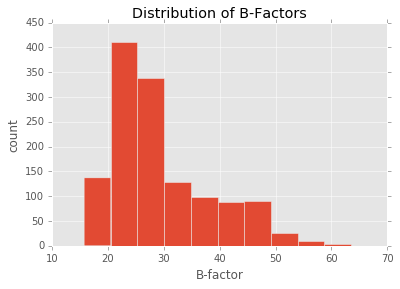

In [31]:
ppdb.df['ATOM']['b_factor'].plot(kind='hist')
plt.title('Distribution of B-Factors')
plt.xlabel('B-factor')
plt.ylabel('count')
plt.show()

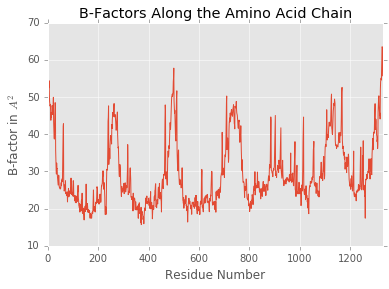

In [32]:
ppdb.df['ATOM']['b_factor'].plot(kind='line')
plt.title('B-Factors Along the Amino Acid Chain')
plt.xlabel('Residue Number')
plt.ylabel('B-factor in $A^2$')
plt.show()

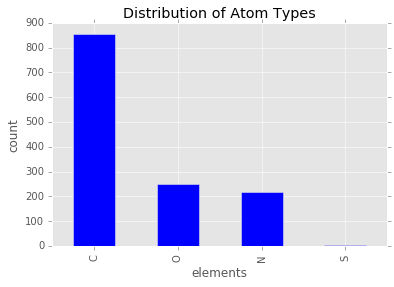

In [26]:
ppdb.df['ATOM']['element_symbol'].value_counts().plot(kind='bar')
plt.title('Distribution of Atom Types')
plt.xlabel('elements')
plt.ylabel('count')
plt.show()

## In-built Functions

BioPandas also comes with certain convenience functions, for example, ...

### Computing the Root Mean Square Deviation

The [Root-mean-square deviation] (RMSD) is simply a measure of the average distance between atoms of 2 protein or ligand structures. This calculation of the Cartesian error follows the equation:

$$RMSD(a, b) = \sqrt{\frac{1}{n} \sum^{n}_{i=1} \big((a_{ix})^2 + (a_{iy})^2 + (a_{iz})^2 \big)} \\
= \sqrt{\frac{1}{n} \sum^{n}_{i=1} || a_i + b_i||_2^2}$$

So, assuming that the we have the following 2 conformation of a ligand molecule

![](./img/ligand_rmsd.png)

we can compute the RMSD as follows:

In [35]:
from biopandas.pdb import PandasPDB

l_1 = PandasPDB().read_pdb('./data/lig_conf_1.pdb')
l_2 = PandasPDB().read_pdb('./data/lig_conf_2.pdb')
r = PandasPDB.rmsd(l_1.df['HETATM'], l_2.df['HETATM'], s='hydrogen', invert=True)
print('RMSD: %.4f Angstrom' % r)

RMSD: 2.6444 Angstrom


Note that the `s` parameter in [`PandasPDB.rmsd`](../api/biopandas.pdb#pandaspdbrmsd) specifies the search string "consider all hydrogen atoms" and via the `invert=True` option, we say "Compute the RMSD for everything BUT the hydrogen atoms" or "Compute the RSMD based on the heavy atoms only".

Similarly, we can compute the RMSD between 2 related protein structures:

![](./img/1t48_rmsd.png)

The hydrogen-free RMSD:

In [37]:
p_1 = PandasPDB().read_pdb('./data/1t48_995.pdb')
p_2 = PandasPDB().read_pdb('./data/1t49_995.pdb')
r = PandasPDB.rmsd(p_1.df['ATOM'], p_2.df['ATOM'], s='hydrogen', invert=True)
print('RMSD: %.4f Angstrom' % r)

RMSD: 0.7377 Angstrom


Or the RMSD between the main chains only:

In [38]:
p_1 = PandasPDB().read_pdb('./data/1t48_995.pdb')
p_2 = PandasPDB().read_pdb('./data/1t49_995.pdb')
r = PandasPDB.rmsd(p_1.df['ATOM'], p_2.df['ATOM'], s='main chain', invert=False)
print('RMSD: %.4f Angstrom' % r)

RMSD: 0.4781 Angstrom


<br>

[more to come]

## Wrapping it up - Saving PDB structures

Finally, let's talk about how to get the PDB structures out of the DataFrame format back into the beloved .pdb format.

Let's say we loaded a PDB structure, removed it from it's hydrogens:

In [1]:
from biopandas.pdb import PandasPDB
ppdb = PandasPDB().read_pdb('./data/3eiy.pdb.gz')
ppdb.df['ATOM'] = ppdb.df['ATOM'][ppdb.df['ATOM']['element_symbol'] != 'H']

We can save the file using the [`PandasPDB.to_pdb`](../api/biopandas.pdb#pandaspdbto_pdb) method:

In [2]:
ppdb.to_pdb(path='./data/3eiy_stripped.pdb', records=None, gz=False, append_newline=True)

By default, all records (that is, 'ATOM', 'HETATM', 'OTHERS', 'ANISOU') are written if we set `records=None`. Alternatively, let's say we want to get rid of the 'ANISOU' entries and produce a compressed gzip archive of our PDB structure:

In [4]:
ppdb.to_pdb(path='./data/3eiy_stripped.pdb.gz', records=['ATOM', 'HETATM', 'OTHERS'], gz=True, append_newline=True)